# Medical Cost Personal Dataset - EDA & Prediction

This project explores the Medical Cost Personal Datasets to uncover insights about healthcare charges 
and build a predictive model using Linear Regression.


## 1. Import Libraries
We start by importing the necessary Python libraries.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset
Read the dataset and show the first few rows.

In [2]:

df = pd.read_csv("Medical Cost Personal Datasets.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Dataset Overview
Check the shape, null values, duplicates, and basic statistics.

In [3]:

print(f"The row count of the data set {df.shape[0]}")
df.info()
df.isna().sum()
df.describe()
df.duplicated().sum()
df.drop_duplicates(inplace=True)


The row count of the data set 1338
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 4. Distribution of Medical Charges

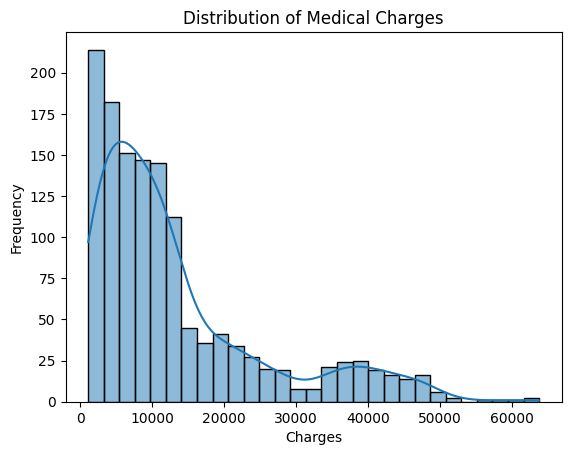

In [4]:

sns.histplot(data=df, x='charges', kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


## 5. Categorical Analysis
### Count of 'sex', 'smoker', and 'region'

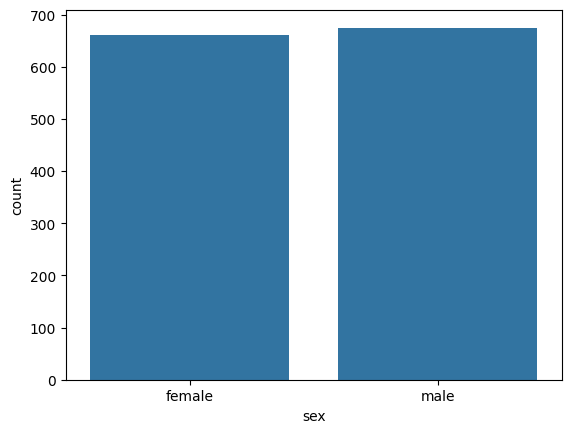

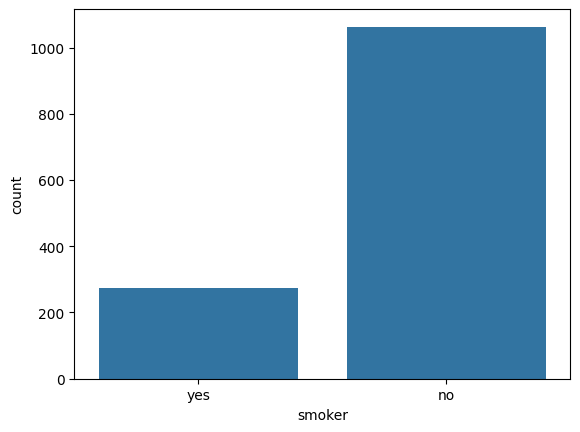

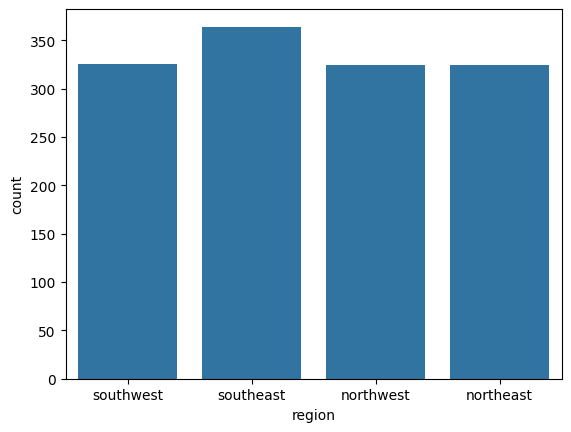

In [5]:

sns.countplot(x='sex', data=df)
plt.show()

sns.countplot(x='smoker', data=df)
plt.show()

sns.countplot(x='region', data=df)
plt.show()


## 6. Distribution of Charges by Smoker

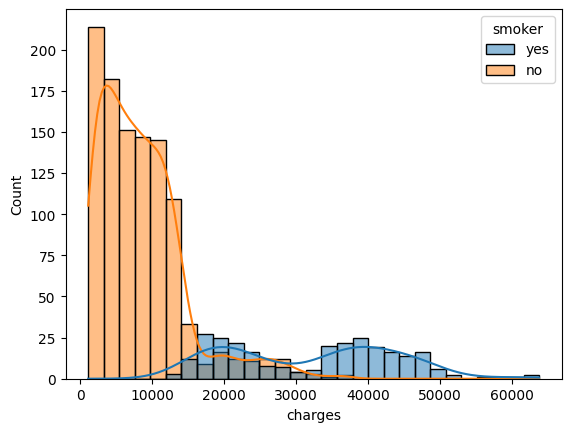

In [6]:

sns.histplot(data=df, x='charges', hue='smoker', kde=True)
plt.show()


## 7. Encode Categorical Variables

In [7]:

from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
df["smoker"] = labelencoder.fit_transform(df["smoker"])
df["sex"] = labelencoder.fit_transform(df["sex"])
df["region"] = labelencoder.fit_transform(df["region"])


## 8. Correlation Heatmap
We examine how features correlate with medical charges.

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64


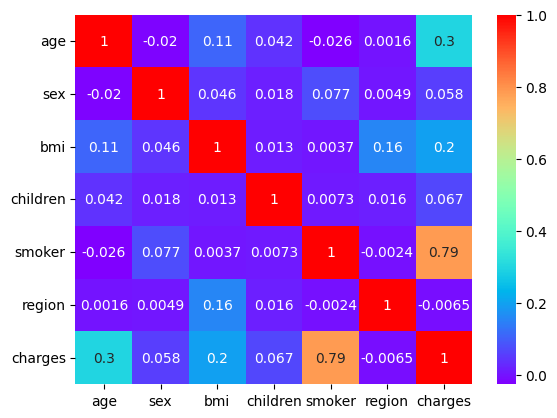

In [8]:

print(df.corr()["charges"].sort_values(ascending=False))
sns.heatmap(df.corr(), annot=True, cmap="rainbow")
plt.show()


## 9. Distribution of All Features

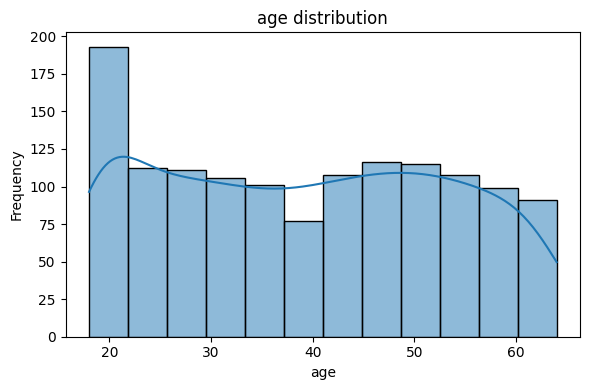

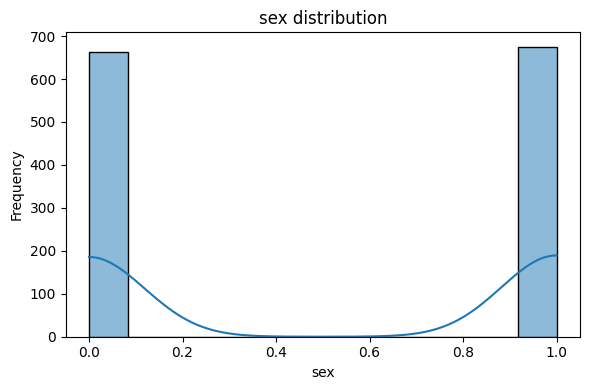

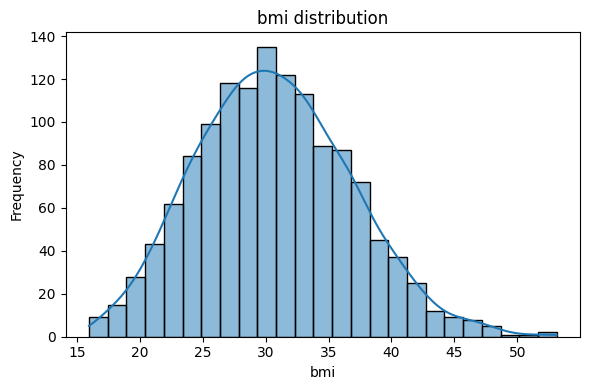

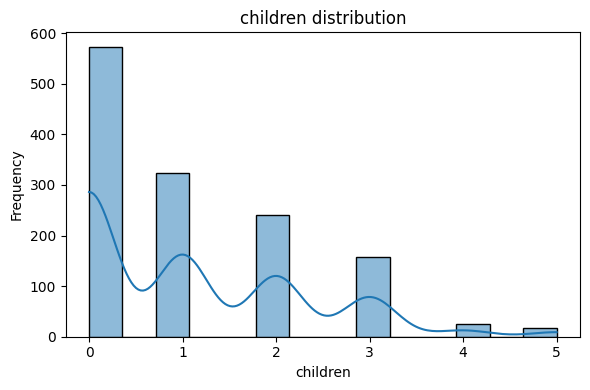

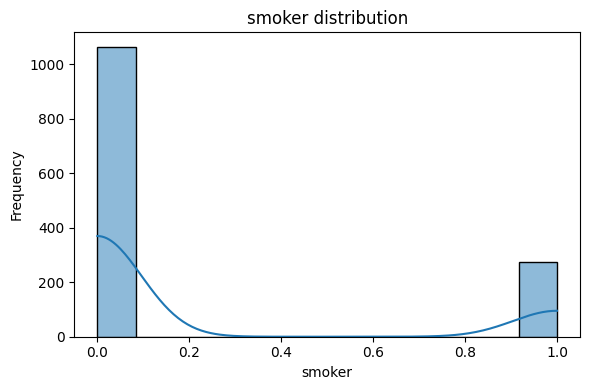

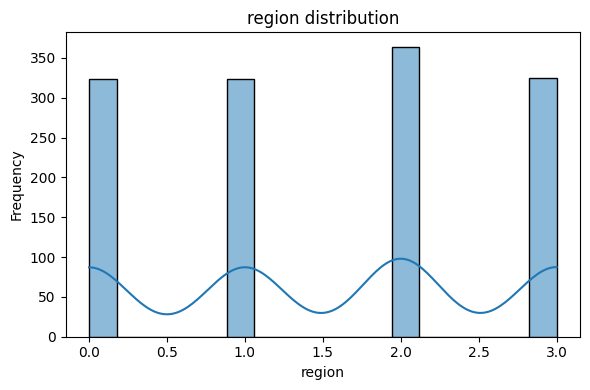

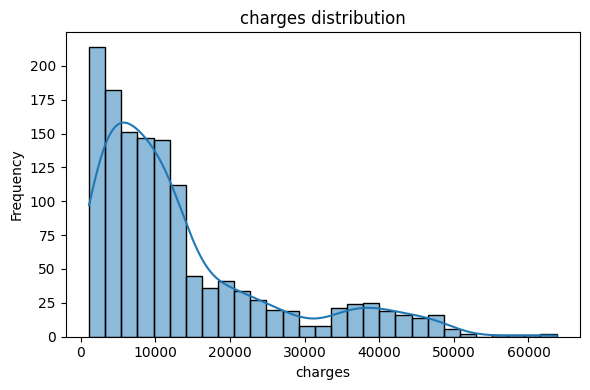

In [9]:

for i in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[i], kde=True)
    plt.title(f"{i} distribution")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


## 10. Scatter Plots: Feature vs Charges

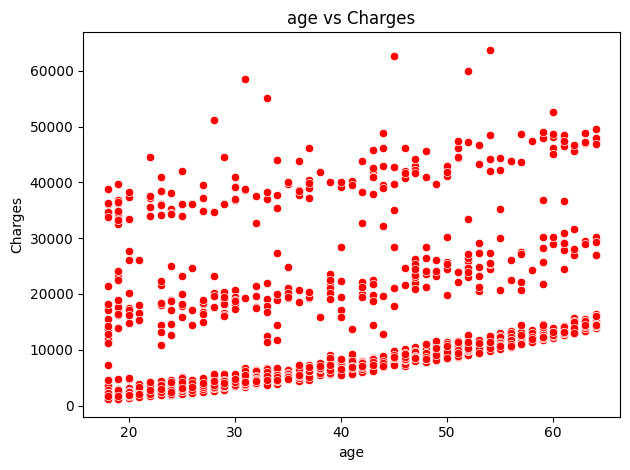

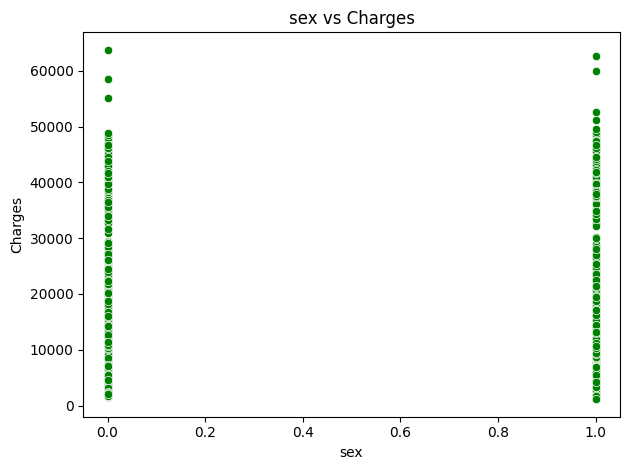

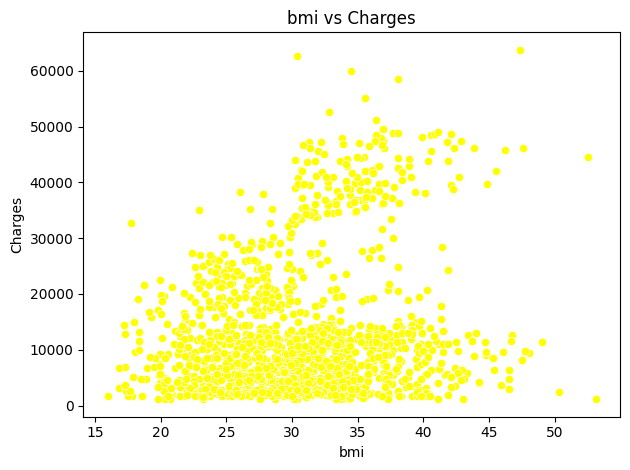

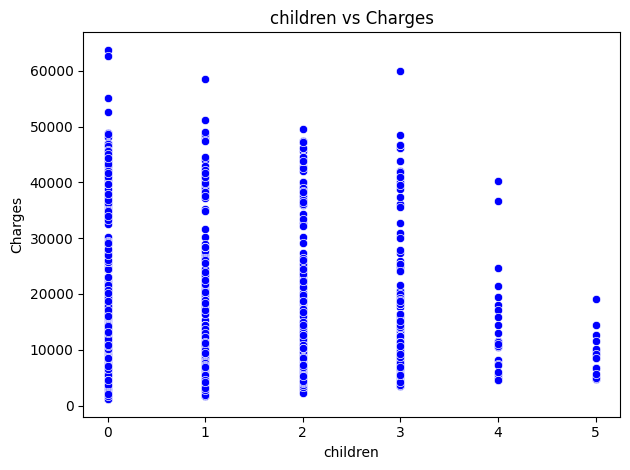

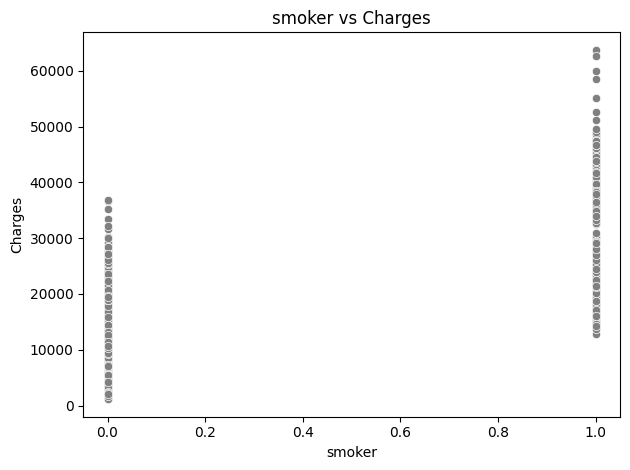

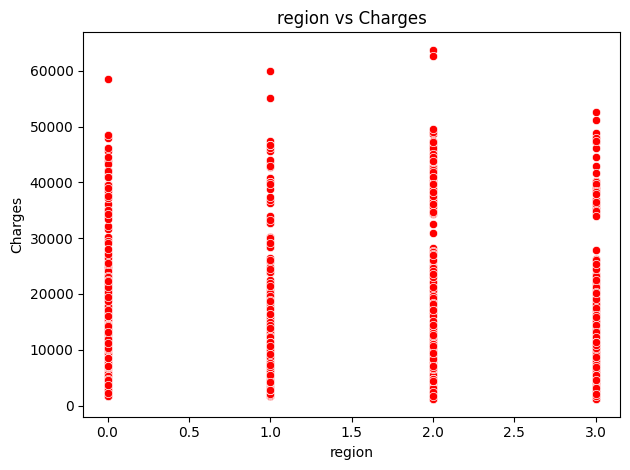

In [10]:

colorsforx = ["Red", "Green", "Yellow", "Blue", "Grey"]
for idx, i in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=i, y="charges", color=colorsforx[idx % len(colorsforx)])
    plt.title(f"{i} vs Charges")
    plt.xlabel(i)
    plt.ylabel("Charges")
    plt.tight_layout()
    plt.show()


## 11. Model Training
We will train a Linear Regression model to predict medical charges.

In [11]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop("charges", axis=1)
y = df["charges"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 12. Predictions and Evaluation
Now, we evaluate the model's performance using Mean Squared Error and R² Score.

In [13]:

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 35493102.61
R² Score: 0.81


## 13 Scatter plot of predicted vs actual values:

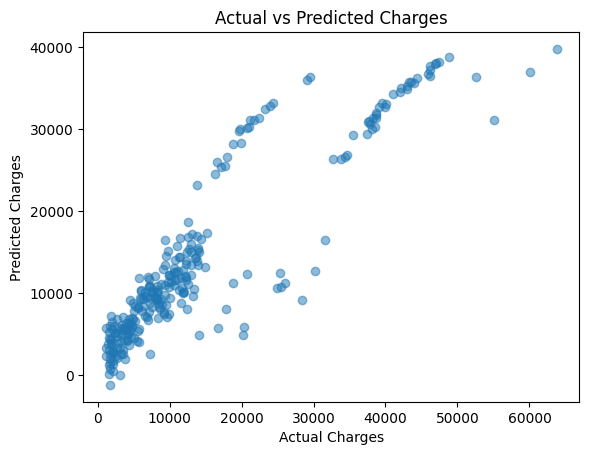

In [14]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()



## 14. EDA Conclusions

- The distribution of medical charges is **right-skewed**, with most charges clustered under 20,000.
- **Smokers** are charged significantly more than non-smokers, which is clearly visible in the histogram with hue.
- Among categorical variables, **smoker** and **region** showed influence on charges.
- There is a **strong positive correlation** between charges and smoking status, and a moderate correlation with age and BMI.

